Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Yifei Fan"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 2:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object $f$ and its approximation $F$.  Note, both f and F can be numpy arrays.

In [3]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    e=numpy.abs(f-F)
    r=e/numpy.abs(f)
            
    r=numpy.array(r)
    p=numpy.array(-numpy.log10(r/5.))
    p=p.astype(int)
    
    return e, r, p


In [4]:
# test simple scalars
e,r,p = errors(numpy.exp(1),2.72)
numpy.testing.assert_allclose([e,r,p],[0.0017181715409551046, 0.0006320799863232398, 3])

# test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('success')

success


**(b)** [4 pts] Use your routine to calculate various errors for several rational approximations to $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 314 / 100$
* $f = \pi$ and $F = 355 / 113$

Compare the most precise approximation to the least precise approximation.  How many more digits of precision do you gain?

In [5]:
# you can put some working code here to generate your answers, but put your answers in the cell below
f=numpy.array([numpy.pi,numpy.pi,numpy.pi])
F=[22./7,314./100,355./113]
e,r,p=errors(f,F)
print(F)
print("absolute error = ",e)
print("relative error = ",r)
print("decimal precision = ",p)


[3.142857142857143, 3.14, 3.1415929203539825]
absolute error =  [1.26448927e-03 1.59265359e-03 2.66764189e-07]
relative error =  [4.02499435e-04 5.06957383e-04 8.49136788e-08]
decimal precision =  [4 3 7]


The most approximation is 355/113, and the least precise approximation is 314/100. It has 3 more digits of precision.

**(c)** [4 pts] $F = n log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

Note: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

854


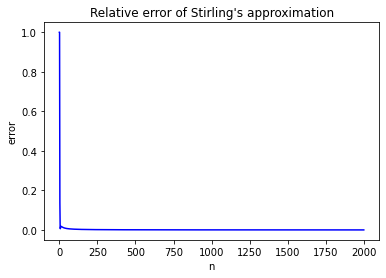

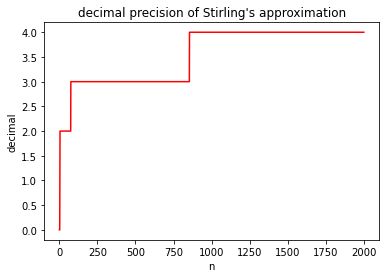

In [6]:
n=range(1,2000)
F=[x*numpy.log(x)-x for x in n]
f=[]
for i in n:
    #log(n!)=
    fi=sum(numpy.log(x) for x in range(1, i))
    f.append(fi)
    
f=numpy.array(f)
F=numpy.array(F)
e=numpy.abs(f-F)
r=[]

for x,y in zip(e,f):
    if y==0:
        if x==0:
            r.append(0)
        else:
            r.append(1)
    else:
        r.append(x/numpy.abs(y))
        
r=numpy.array(r)
p=numpy.array(-numpy.log10(r/5.))
p=p.astype(int)

for i in n:
    if p[i]>=4:
        print(i)
        break
        

plt.plot(n, r, color = 'blue') 
           
plt.title("Relative error of Stirling's approximation") 
plt.xlabel("n") 
plt.ylabel("error") 
plt.show()  

plt.plot(n, p, color = 'red')
plt.title("decimal precision of Stirling's approximation") 
plt.xlabel("n") 
plt.ylabel("decimal") 
plt.show() 

n=854 is the smallest n that the approximation have 4 decimal precision

## Question 2

[4 pts] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $O$).


The order of approximation for their sum is $O(\Delta x^4)$, and the order of approximation for their product is also $O(\Delta x^4)$

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

Answer: $$r_n=\frac{|R_n(x)|}{|e^x|}=\frac{|\frac{e^c\cdot (x-x_0)^{n+1}}{(n+1)!}|}{|e^x|}$$

where $x_0=0$, and $e^c$ has an upper bound when $c=x$. That is $r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$

**(b)** [4 pts] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

$$| \frac{x^{n+1}}{(n + 1)!}  | \leq \epsilon_{machine}$$

assume $x > 0$, then $$x^{n+1}\leq \epsilon_{machine}\cdot(n + 1)!$$

since n is large, we can use Stirling's approximation so that $$log(x^{n+1})\leq log(\epsilon_{machine}\cdot(n + 1)!)$$
$$log(x^{n+1})\leq log(\epsilon_{machine})+log((n + 1)!)$$
$$log(x^{n+1})< log(\epsilon_{machine})+(n+1) log(n+1)-n-1$$
$$log(x^{n+1})+log(e^{n+1})< log(\epsilon_{machine}\cdot (n+1)^{n+1})$$
$$(e \cdot x)^{n+1} < \epsilon_{machine}\cdot (n+1)^{n+1}$$
$$e \cdot x < \epsilon_{machine}^{-(n+1)}\cdot (n+1)$$
$$e \cdot x < (n+1)$$

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [7]:
def Tn_exp(x):
    """ Calculate e^x using Taylor polynomials approximation
    
    output for x < 0 is given by 1/Tn_exp(-x)
    
    Outputs:
        MAX_N: int
            maximum number of terms used to calculate approximation
            Here I use a fixed number since this function may take small x, 
            and it will not be able to give a good approximation if I use e*x as MAX_N for such x
        Tn: float
            First MAX_N terms of Taylor approximation of e^x
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = upper round of abs(ex)
    
    if x>=0:
        MAX_N=numpy.abs(numpy.exp(1)*50)
        MAX_N=MAX_N.astype(int)+1
        Tn=1./factorial(MAX_N)
        for n in range(MAX_N):
            Tn=Tn*x+1./factorial(MAX_N-n)
        Tn=Tn*x+1
    else:
        Tn,MAX_N=Tn_exp(-x)
        Tn=1./Tn
    return Tn, MAX_N

8.218407461554972e+307
9.460708892385095e+157
8.218407461554972e+307
1.0
4503599627370496.0
3.1035316813264893e+294
170.0702257577037


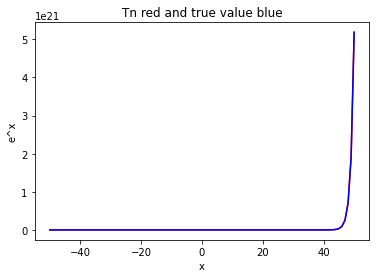

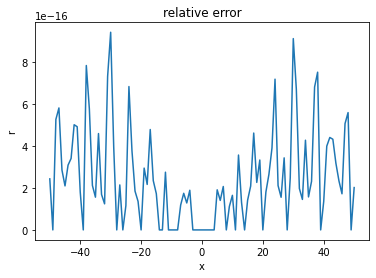

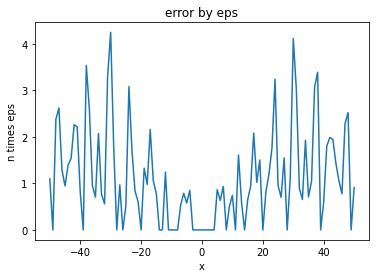

In [8]:
# Feel free to test your code here and/or make a plot of errors\
x=709.
ex=numpy.exp(x)
exx=numpy.exp(1)**x
Tn49, N=Tn_exp(x)
eps=numpy.finfo(float).eps
print(ex)
print(Tn49)
print((ex-Tn49))
print((ex-Tn49)/ex)
print((ex-Tn49)/ex/eps)
print((ex-exx))
print((ex-exx)/ex/eps)


x=numpy.linspace(-50, 50, 101)
f=numpy.exp(x)
F=numpy.zeros(x.shape)
N=numpy.zeros(x.shape)
for i, xi in enumerate(x):
    F[i], N[i]=Tn_exp(xi)
    
a=numpy.abs(F-f)
r=a/f
t=r/eps

plt.plot(x, F, color = 'red') 
plt.plot(x, f, color = 'blue') 
plt.title("Tn red and true value blue") 
plt.xlabel("x") 
plt.ylabel("e^x") 
plt.show()  

plt.plot(x, r) 
plt.title("relative error") 
plt.xlabel("x") 
plt.ylabel("r") 
plt.show()  

plt.plot(x, t) 
plt.title("error by eps") 
plt.xlabel("x") 
plt.ylabel("n times eps") 
plt.show() 

In [9]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

The relative error in units of machine epsilon for my routine and f=numpy.exp(709) is 4503599627370496.0 
This is because my routine uses factorial of n which grows faster than e^n for large n, so n! reaches the overflow before it gives a accurate result.

The relative error in units of machine epsilon for numpy.exp(1)\**709 and numpy.exp(709) is around 170. 

I guess this is because the epsilon error of exp(1) adds up when doing mutiplication, while exp(709) calculate the value directly

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [10]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
# Testing Cell (do not copy)

x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$.

**(a)** [4 pts] Calculate the number of  numbers that can be  represented with this system?  What are the underflow and overflow limits? What is machine epsilon?

Number of numbers: 2x3x4x4x7+1=673

Underflow: 1.00 x 4^(-3) = 0.015625

Overflow: 3.33 x 4^3 = 252

$\epsilon_{machine} = 4^{-2}=0.0625$

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

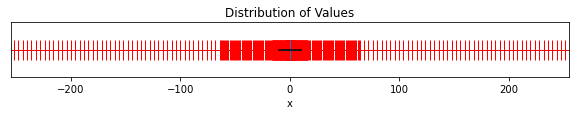

In [11]:
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [-3, -2, -1, 0, 1, 2, 3]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + d2 * 0.25+d3*0.0625) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + d2 * 0.25+d3*0.0625) * 4**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-255, 255])
plt.show()

**(c)** [4 pts] Roughly how many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g. $p$ and $E$ are the same, only the base $\beta$ is different)?

For fixed p and E, base 4 can represent 2 x 3 x 4^(p-1) x ||E|| +1 numbers, while base 2 can represent 2 x 1 x 2^(p-1) x ||E|| + 1.

Base 4 has roughly 3 x 2^(p-1) times more numbers than base 2